# STATS 102 Final Project
Team members: Anar, Angarag, Temuulen
## Predicting whether a person has sleep disorder or not through logistic regression

Data info:
- Gender: The gender of the person (Male/Female).
- Age: The age of the person in years.
- Occupation: The occupation or profession of the person.
- Sleep Duration (hours): The number of hours the person sleeps per day.
- Quality of Sleep (scale: 1-10): A subjective rating of the quality of sleep, ranging from 1 to 10.
- Physical Activity Level (minutes/day): The number of minutes the person engages in physical activity daily.
- Stress Level (scale: 1-10): A subjective rating of the stress level experienced by the person, ranging from 1 to 10.
- BMI Category: The BMI category of the person (e.g., Underweight, Normal, Overweight).
- Heart Rate (bpm): The resting heart rate of the person in beats per minute.
- Sleep Disorder: The presence or absence of a sleep disorder in the person (None, Insomnia, Sleep Apnea).

Initial library imports

In [235]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split

Loading our data. 

In the "BMI Category" column, there were "normal" bmi and "normal weight" bmi. Thus, we will be changing the latter to "normal".

In [236]:
dt = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')
dt = dt.assign(BMI_Category=lambda x: x['BMI Category'].map({'Obese': "Obese", 'Normal': 'Normal', 'Overweight': 'Overweight', 'Normal Weight': 'Normal'}))
dt.drop(columns = "BMI Category", inplace= True)

In [237]:
dt.describe().round(2)

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.00,374.00,374.00,374.00,374.00,374.00,374.00,374.00
mean,187.50,42.18,7.13,7.31,59.17,5.39,70.17,6816.84
std,108.11,8.67,0.80,1.20,20.83,1.77,4.14,1617.92
min,1.00,27.00,5.80,4.00,30.00,3.00,65.00,3000.00
25%,94.25,35.25,6.40,6.00,45.00,4.00,68.00,5600.00
50%,187.50,43.00,7.20,7.00,60.00,5.00,70.00,7000.00
75%,280.75,50.00,7.80,8.00,75.00,7.00,72.00,8000.00
max,374.00,59.00,8.50,9.00,90.00,8.00,86.00,10000.00


In [238]:
dt.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,BMI_Category
0,1,Male,27,Software Engineer,6.1,6,42,6,126/83,77,4200,NaN,Overweight
1,2,Male,28,Doctor,6.2,6,60,8,125/80,75,10000,NaN,Normal
2,3,Male,28,Doctor,6.2,6,60,8,125/80,75,10000,NaN,Normal
3,4,Male,28,Sales Representative,5.9,4,30,8,140/90,85,3000,Sleep Apnea,Obese
4,5,Male,28,Sales Representative,5.9,4,30,8,140/90,85,3000,Sleep Apnea,Obese


In [239]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   Blood Pressure           374 non-null    object 
 9   Heart Rate               374 non-null    int64  
 10  Daily Steps              374 non-null    int64  
 11  Sleep Disorder           155 non-null    object 
 12  BMI_Category             374 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [240]:
dt

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,BMI_Category
0,1,Male,27,Software Engineer,6.1,6,42,6,126/83,77,4200,NaN,Overweight
1,2,Male,28,Doctor,6.2,6,60,8,125/80,75,10000,NaN,Normal
2,3,Male,28,Doctor,6.2,6,60,8,125/80,75,10000,NaN,Normal
3,4,Male,28,Sales Representative,5.9,4,30,8,140/90,85,3000,Sleep Apnea,Obese
4,5,Male,28,Sales Representative,5.9,4,30,8,140/90,85,3000,Sleep Apnea,Obese
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,140/95,68,7000,Sleep Apnea,Overweight
370,371,Female,59,Nurse,8.0,9,75,3,140/95,68,7000,Sleep Apnea,Overweight
371,372,Female,59,Nurse,8.1,9,75,3,140/95,68,7000,Sleep Apnea,Overweight
372,373,Female,59,Nurse,8.1,9,75,3,140/95,68,7000,Sleep Apnea,Overweight


In [241]:
dt.isna().sum()

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
BMI_Category                 0
dtype: int64

There is no NaN values in our dataset

In [242]:
dt['Blood Pressure'].unique()

array(['126/83', '125/80', '140/90', '120/80', '132/87', '130/86',
       '117/76', '118/76', '128/85', '131/86', '128/84', '115/75',
       '135/88', '129/84', '130/85', '115/78', '119/77', '121/79',
       '125/82', '135/90', '122/80', '142/92', '140/95', '139/91',
       '118/75'], dtype=object)

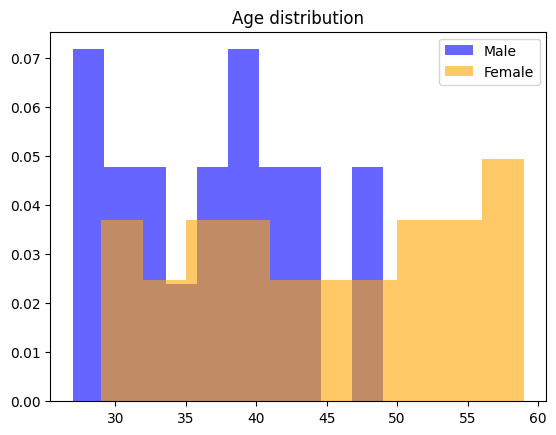

In [243]:
# Check the distribution of 'Age' column
df_ga = dt.groupby(['Age', 'Gender']).size().reset_index(name='count')

# Select data for male and female
df_m = df_ga[df_ga['Gender'] == 'Male']
df_f = df_ga[df_ga['Gender'] == 'Female']

plt.hist(data=df_m, x='Age', color='blue', alpha=0.6, density=True, label='Male')
plt.hist(data=df_f, x='Age', color='orange', alpha=0.6, density=True, label='Female')
plt.title('Age distribution')
plt.legend()
plt.show()


Changing the data to different groups

For blood pressure:
- Ideal blood pressure systolic (upper number) : less than 120 , diastolic (bottom number) : less than 80

- Normal systolic (upper number) : in range (120 - 129) , diastolic (bottom number) : in range (80 - 84)

- Otherwise, blood pressure is high (which is 1)

In [244]:
dt['Blood Pressure']=dt['Blood Pressure'].apply(lambda x:0 if x in ['120/80','126/83','125/80','128/84','129/84','117/76','118/76','115/75','125/82','122/80'] else 1)
dt["Age"]=pd.cut(dt["Age"],4)            # This will cut the age section into 4 sections (from 0 to 3)
dt["Heart Rate"]=pd.cut(dt["Heart Rate"],4)   # This will also cut the heart rate section into 4 sections (from 0 to 3)
dt["Daily Steps"]=pd.cut(dt["Daily Steps"],4)   
dt["Sleep Duration"]=pd.cut(dt["Sleep Duration"],3)    
dt["Physical Activity Level"]=pd.cut(dt["Physical Activity Level"],4)

Converting non-numeric data (String or Boolean) into numbers and droping "Person ID" since it is useless.

In [245]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()

categories=['Gender','Age','Occupation','Sleep Duration','Physical Activity Level','BMI_Category','Heart Rate','Daily Steps','Sleep Disorder']
for label in categories:
    dt[label]=LE.fit_transform(dt[label])

dt.drop(['Person ID'], axis=1, inplace=True)

Splitting our data into 75,25 for training and testing.

In [246]:
x=dt.iloc[:,:-1]
y=dt.iloc[:,-1]

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=123,shuffle=True)

Testing our model and checking it's accuracy.

In [247]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model=LogisticRegression(max_iter=1000).fit(x_train,y_train)


print(f"Training score: {round(model.score(x_train,y_train)*100,2)}")
print(f"Testing score: {round(model.score(x_test,y_test)*100,2)}")

Training score: 98.57
Testing score: 97.87


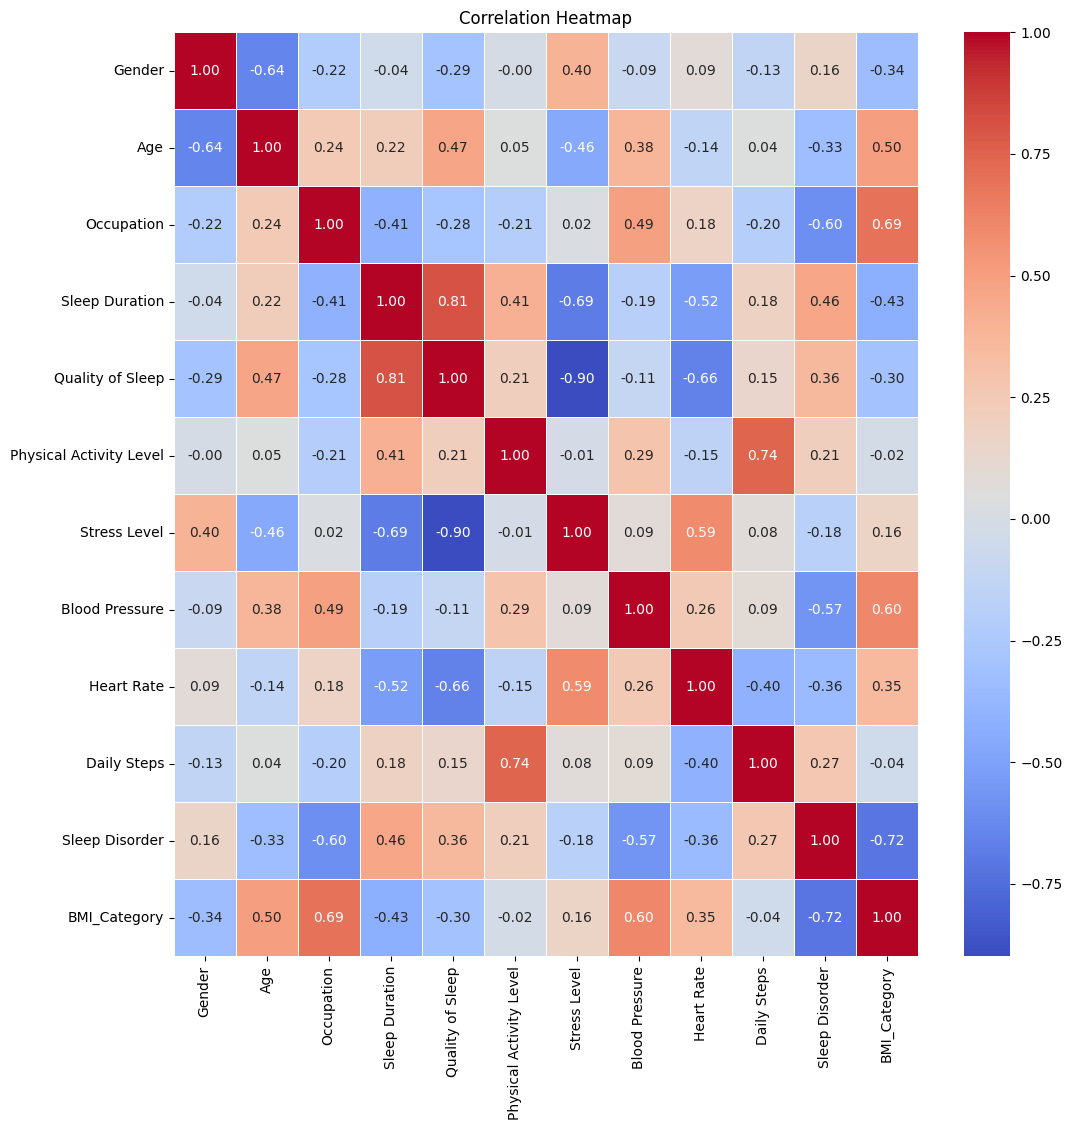

In [249]:
matrix = dt.corr()
plt.figure(figsize=(12, 12))
sns.heatmap(matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Correlation Heatmap")
plt.show()

Haven't implemented our input feature yet.